In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
r = requests.get('https://www.yelp.com/biz/tesla-san-francisco?osq=Tesla+Dealership')

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
results = soup.findAll(class_='margin-b2__09f24__CEMjT border-color--default__09f24__NPAKY')

In [6]:
reviews = []

In [7]:
for result in results:
    reviews.append(result.find('span').text)

In [8]:
reviews

['Got a question about Tesla? Ask the Yelp community!',
 "Nick has been amazing in educating us about the Teslas and answering all of our many questions. There's so much information online that it's overwhelming so it's great to talk to someone in person. Plus Nick was just so wonderful, helpful and trustworthy. It made buying our first new car a great experience and we are so thrilled to have our new Tesla soon! Also it's a huuuuuuge relief to not have to spend energy and time negotiating on price and all that.",
 'Still fun after two years, the Tesla Model 3 is a joy to drive. Full-Self Driving is in Beta release and is likely to remain so until sometime next year. Just finished a road trip from California to Colorado with recharging stations aplenty and easy to find.',
 '',
 "Well, I had an issue with my Tesla. Took it into the service center on Thursday. They called me earlier today to tell me to come in and pick up my car and then summarily canceled the Uber voucher that I was giv

# Analysing Data

In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.DataFrame(np.array(reviews),columns=['review'])

In [12]:
len(df['review'])

19

In [13]:
df.drop(df[df['review'] ==''].index, inplace = True)

In [14]:
df['word_count']=df['review'].apply(lambda x: len(x.split()))

In [15]:
df.head()

,review,word_count
0,Got a question about Tesla? Ask the Yelp commu...,9
1,Nick has been amazing in educating us about th...,83
2,"Still fun after two years, the Tesla Model 3 i...",47
4,"Well, I had an issue with my Tesla. Took it in...",73
6,Today I went to the San Francisco Tesla Dealer...,121


In [16]:
df['char_count']=df['review'].apply(lambda x: len(x))

In [17]:
df

,review,word_count,char_count
0,Got a question about Tesla? Ask the Yelp commu...,9,51
1,Nick has been amazing in educating us about th...,83,459
2,"Still fun after two years, the Tesla Model 3 i...",47,258
4,"Well, I had an issue with my Tesla. Took it in...",73,350
6,Today I went to the San Francisco Tesla Dealer...,121,621
8,Crappy plastic piece falls off the bottom of t...,57,325
9,This is for our amazing experience with the se...,110,587
10,Do you love having your car held hostage for t...,59,309
11,Kevin and Bridget were amazing. I purchased a ...,127,703
13,Dear dad can you buy me a Tesla to drive at gr...,13,56


In [18]:
def average_word(x):
    words = x.split()
    return sum( len(word) for word in words)/(len(words))

In [19]:
df['average_word_lenght']=df['review'].apply(lambda x : average_word(x))

In [26]:
from nltk.corpus import stopwords

In [32]:
stop_words=stopwords.words('english')

In [34]:
len(stop_words)

179

In [36]:
df['stop_word_count']=df['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [37]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3
1,Nick has been amazing in educating us about th...,83,459,4.542169,41
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66


In [38]:
df['stop_word_rate']=df['stop_word_count']/df['word_count']

In [39]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455


In [40]:
df.sort_values(by='stop_word_rate')

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate
16,Discover,1,8,8.000000,0,0.000000
18,Languages,1,9,9.000000,0,0.000000
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333
17,Yelp for Business,3,17,5.000000,1,0.333333
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255
13,Dear dad can you buy me a Tesla to drive at gr...,13,56,3.384615,6,0.461538
10,Do you love having your car held hostage for t...,59,309,4.254237,28,0.474576
14,I am appalled by the poor service at this Tesl...,134,696,4.171642,64,0.477612
9,This is for our amazing experience with the se...,110,587,4.300000,54,0.490909
8,Crappy plastic piece falls off the bottom of t...,57,325,4.719298,28,0.491228


In [41]:
df.describe()

,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,55.933333,296.933333,4.943493,27.466667,0.434855
std,50.225871,266.369900,1.517489,25.525524,0.232439
min,1.000000,5.000000,3.384615,0.000000,0.000000
25%,6.000000,34.000000,4.212940,2.000000,0.368794
50%,57.000000,309.000000,4.542169,28.000000,0.477612
75%,96.500000,523.000000,4.888889,47.500000,0.495019
max,134.000000,703.000000,9.000000,66.000000,1.000000


# Data cleanning

In [43]:
df['review']

0     Got a question about Tesla? Ask the Yelp commu...
1     Nick has been amazing in educating us about th...
2     Still fun after two years, the Tesla Model 3 i...
4     Well, I had an issue with my Tesla. Took it in...
6     Today I went to the San Francisco Tesla Dealer...
8     Crappy plastic piece falls off the bottom of t...
9     This is for our amazing experience with the se...
10    Do you love having your car held hostage for t...
11    Kevin and Bridget were amazing. I purchased a ...
13    Dear dad can you buy me a Tesla to drive at gr...
14    I am appalled by the poor service at this Tesl...
15                                                About
16                                             Discover
17                                    Yelp for Business
18                                            Languages
Name: review, dtype: object

In [44]:
df['lowercase']=df['review'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [45]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,lowercase
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,got a question about tesla? ask the yelp commu...
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,nick has been amazing in educating us about th...
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,"still fun after two years, the tesla model 3 i..."
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,"well, i had an issue with my tesla. took it in..."
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,today i went to the san francisco tesla dealer...


In [47]:
df['ponctuation']=df['lowercase'].str.replace('[^\w\s]','')

C:\Users\dell\AppData\Local\Temp\ipykernel_23408\1103155098.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ponctuation']=df['lowercase'].str.replace('[^\w\s]','')


In [48]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,lowercase,ponctuation
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,got a question about tesla? ask the yelp commu...,got a question about tesla ask the yelp community
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,nick has been amazing in educating us about th...,nick has been amazing in educating us about th...
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,"still fun after two years, the tesla model 3 i...",still fun after two years the tesla model 3 is...
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,"well, i had an issue with my tesla. took it in...",well i had an issue with my tesla took it into...
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,today i went to the san francisco tesla dealer...,today i went to the san francisco tesla dealer...


In [50]:
from nltk.corpus import stopwords

In [51]:
stop_words=stopwords.words('english')

In [53]:
df['stop_words']=df['ponctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [54]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,lowercase,ponctuation,stop_words
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,got a question about tesla? ask the yelp commu...,got a question about tesla ask the yelp community,got question tesla ask yelp community
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,nick has been amazing in educating us about th...,nick has been amazing in educating us about th...,nick amazing educating us teslas answering man...
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,"still fun after two years, the tesla model 3 i...",still fun after two years the tesla model 3 is...,still fun two years tesla model 3 joy drive fu...
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,"well, i had an issue with my tesla. took it in...",well i had an issue with my tesla took it into...,well issue tesla took service center thursday ...
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,today i went to the san francisco tesla dealer...,today i went to the san francisco tesla dealer...,today went san francisco tesla dealer first ti...


In [60]:
pd.Series(" ".join(df['stop_words']).split()).value_counts()[:30]

tesla         13
service        8
model          7
experience     6
car            5
us             5
new            5
today          5
amazing        4
time           4
questions      4
went           4
made           3
get            3
great          3
back           3
first          3
issue          3
bridget        3
kevin          3
location       3
poor           3
warranty       3
nick           3
would          3
drive          3
gave           2
guy            2
took           2
app            2
dtype: int64

In [63]:
other_stop_words=['us','would','get','3']

In [65]:
df['cleanreview']=df['stop_words'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words ))

In [87]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,lowercase,ponctuation,stop_words,cleanreview
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,got a question about tesla? ask the yelp commu...,got a question about tesla ask the yelp community,got question tesla ask yelp community,got question tesla ask yelp community
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,nick has been amazing in educating us about th...,nick has been amazing in educating us about th...,nick amazing educating us teslas answering man...,nick amazing educating teslas answering many q...
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,"still fun after two years, the tesla model 3 i...",still fun after two years the tesla model 3 is...,still fun two years tesla model 3 joy drive fu...,still fun two years tesla model joy drive full...
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,"well, i had an issue with my tesla. took it in...",well i had an issue with my tesla took it into...,well issue tesla took service center thursday ...,well issue tesla took service center thursday ...
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,today i went to the san francisco tesla dealer...,today i went to the san francisco tesla dealer...,today went san francisco tesla dealer first ti...,today went san francisco tesla dealer first ti...


# Lemmatazation

In [88]:
from textblob import Word

In [89]:
df['lemmatized']=df['cleanreview'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [90]:
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,lowercase,ponctuation,stop_words,cleanreview,lemmatized
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,got a question about tesla? ask the yelp commu...,got a question about tesla ask the yelp community,got question tesla ask yelp community,got question tesla ask yelp community,got question tesla ask yelp community
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,nick has been amazing in educating us about th...,nick has been amazing in educating us about th...,nick amazing educating us teslas answering man...,nick amazing educating teslas answering many q...,nick amazing educating tesla answering many qu...
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,"still fun after two years, the tesla model 3 i...",still fun after two years the tesla model 3 is...,still fun two years tesla model 3 joy drive fu...,still fun two years tesla model joy drive full...,still fun two year tesla model joy drive fulls...
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,"well, i had an issue with my tesla. took it in...",well i had an issue with my tesla took it into...,well issue tesla took service center thursday ...,well issue tesla took service center thursday ...,well issue tesla took service center thursday ...
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,today i went to the san francisco tesla dealer...,today i went to the san francisco tesla dealer...,today went san francisco tesla dealer first ti...,today went san francisco tesla dealer first ti...,today went san francisco tesla dealer first ti...


# Sentiment Analysis

In [91]:
from textblob import TextBlob

In [95]:
df['polarity']=df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

In [96]:
df['subjectivity']=df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [98]:
df.drop(['lowercase','ponctuation','stop_words','cleanreview','lemmatized'], inplace=True, axis=1)
df.head()

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,polarity,subjectivity
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,0.000000,0.000000
1,Nick has been amazing in educating us about th...,83,459,4.542169,41,0.493976,0.502066,0.640220
2,"Still fun after two years, the Tesla Model 3 i...",47,258,4.510638,19,0.404255,0.306667,0.446667
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,0.000000,0.413333
6,Today I went to the San Francisco Tesla Dealer...,121,621,4.140496,66,0.545455,0.369453,0.619012


In [99]:
df.sort_values(by="polarity")

,review,word_count,char_count,average_word_lenght,stop_word_count,stop_word_rate,polarity,subjectivity
10,Do you love having your car held hostage for t...,59,309,4.254237,28,0.474576,-0.066667,0.566667
14,I am appalled by the poor service at this Tesl...,134,696,4.171642,64,0.477612,-0.039773,0.462085
0,Got a question about Tesla? Ask the Yelp commu...,9,51,4.777778,3,0.333333,0.000000,0.000000
4,"Well, I had an issue with my Tesla. Took it in...",73,350,3.808219,38,0.520548,0.000000,0.413333
13,Dear dad can you buy me a Tesla to drive at gr...,13,56,3.384615,6,0.461538,0.000000,0.000000
15,About,1,5,5.000000,1,1.000000,0.000000,0.000000
16,Discover,1,8,8.000000,0,0.000000,0.000000,0.000000
17,Yelp for Business,3,17,5.000000,1,0.333333,0.000000,0.000000
18,Languages,1,9,9.000000,0,0.000000,0.000000,0.000000
11,Kevin and Bridget were amazing. I purchased a ...,127,703,4.543307,63,0.496063,0.044318,0.493750


In [115]:
import matplotlib.pyplot as plt
import numpy as np

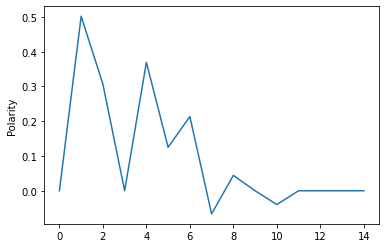

In [120]:
plt.plot(np.arange(0,len(df['review'])),df['polarity'],)
plt.ylabel('Polarity')
plt.show()

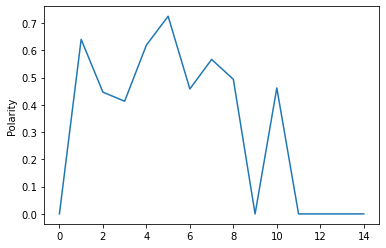

In [121]:
plt.plot(np.arange(0,len(df['review'])),df['subjectivity'],)
plt.ylabel('Polarity')
plt.show()